Data Preparation


In [2]:
import pandas as pd
from datetime import datetime

# Load the dataset from CSV file
df = pd.read_csv('/content/advertising.csv')

# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Display the DataFrame
print(df.head())


   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

            Timestamp  Clicked on Ad  
0 2016-03-27 00:53:11              0  
1 2016-04-04 01:39:02     

Feature Engineering

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
label_encoder = LabelEncoder()

df['Ad Topic Line'] = label_encoder.fit_transform(df['Ad Topic Line'])
df['City'] = label_encoder.fit_transform(df['City'])
df['Country'] = label_encoder.fit_transform(df['Country'])

# Extract additional time-based features
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['Month'] = df['Timestamp'].dt.month

# Drop the original Timestamp column
df.drop('Timestamp', axis=1, inplace=True)

# Display the modified DataFrame
print(df.head())


   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

   Ad Topic Line  City  Male  Country  Clicked on Ad  Hour  Day  Month  
0             91   961     0      215              0     0   27      3  
1            464   903     1      147              0     1    4      4  
2            566   111     0      184              0    20   13      3  
3            903   939     1      103              0     2   10      1  
4            766   805     0       96              0     3    3      6  


CLAASIFICATION MODULE

Model -1 [Logistic regression]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split the data into features and target
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Train Logistic Regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_lr = logistic_regression_model.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Test Accuracy: {accuracy_lr:.4f}')


Logistic Regression Test Accuracy: 0.9500


MODEL 3 [ Gradient Boosting Model]

In [6]:
# Train Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier()
gradient_boosting_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred_gb = gradient_boosting_model.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Test Accuracy: {accuracy_gb:.4f}')



Gradient Boosting Test Accuracy: 0.9350


MODEL BUILDING


MODEL -4 NEURAL NETWORK

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Split the data into features and target
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 1s 16ms/step - loss: 0.7389 - accuracy: 0.5609 - val_loss: 0.5903 - val_accuracy: 0.7875
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5900 - accuracy: 0.6938 - val_loss: 0.4756 - val_accuracy: 0.9250
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4926 - accuracy: 0.7844 - val_loss: 0.3774 - val_accuracy: 0.9500
Epoch 4/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3939 - accuracy: 0.8750 - val_loss: 0.2868 - val_accuracy: 0.9625
Epoch 5/50
20/20 [==============================] - 0s 4ms/step - loss: 0.3180 - accuracy: 0.9094 - val_loss: 0.2149 - val_accuracy: 0.9750
Epoch 6/50
20/20 [==============================] - 0s 4ms/step - loss: 0.2666 - accuracy: 0.9125 - val_loss: 0.1669 - val_accuracy: 0.9750
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 0.2088 - accuracy: 0.9469 - val_loss: 0.1362 - val_accuracy: 0.9812
Epoch 8/50
20/20 [=

In [9]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


7/7 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.9400
Test Accuracy: 0.9400


In [10]:
# Make predictions on new data
new_data = [[70, 28, 60000, 240, 3, 5, 1, 100, 14, 2, 7]]  # Example new data point
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print(f'Prediction: {"Clicked on Ad" if prediction[0][0] > 0.5 else "Did not Click on Ad"}')

1/1 [==============================] - 0s 92ms/step
Prediction: Did not Click on Ad


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


COMPARISON

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Assuming df is already defined and contains the data
# Split the data into features and target
X = df.drop('Clicked on Ad', axis=1)
y = df['Clicked on Ad']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

# Train and evaluate Logistic Regression
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f'Logistic Regression Accuracy: {accuracy_log_reg:.4f}')

# Train and evaluate Random Forest
rf_clf.fit(X_train_scaled, y_train)
y_pred_rf_clf = rf_clf.predict(X_test_scaled)
accuracy_rf_clf = accuracy_score(y_test, y_pred_rf_clf)
print(f'Random Forest Classifier Accuracy: {accuracy_rf_clf:.4f}')

# Train and evaluate Gradient Boosting
gb_clf.fit(X_train_scaled, y_train)
y_pred_gb_clf = gb_clf.predict(X_test_scaled)
accuracy_gb_clf = accuracy_score(y_test, y_pred_gb_clf)
print(f'Gradient Boosting Classifier Accuracy: {accuracy_gb_clf:.4f}')


Logistic Regression Accuracy: 0.9500
Random Forest Classifier Accuracy: 0.9300
Gradient Boosting Classifier Accuracy: 0.9350


<ipython-input-12-3d54c341b834>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


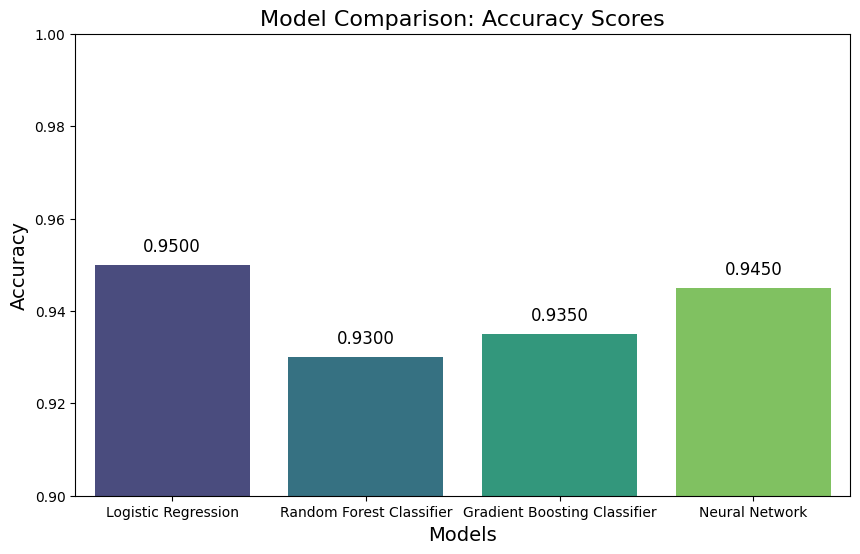

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names
models = ['Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier', 'Neural Network']

# Accuracy scores
accuracies = [0.9500, 0.9300, 0.9350, 0.9450]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')

# Add title and labels
plt.title('Model Comparison: Accuracy Scores', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

# Show accuracy scores on the bars
for i in range(len(models)):
    plt.text(i, accuracies[i] + 0.002, f"{accuracies[i]:.4f}", ha='center', va='bottom', fontsize=12)

# Display the plot
plt.ylim(0.9, 1.0)  # Set y-axis limit for better visualization
plt.show()


CONTENT BASED RECOMMENDATION

In [14]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

# Load data from CSV
df = pd.read_csv('/content/advertising.csv')

# Ensure that the 'Ad Topic Line' column is treated as text
df['Ad Topic Line'] = df['Ad Topic Line'].astype(str)

# TF-IDF Vectorizer for 'Ad Topic Line'
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Ad Topic Line'])

# Compute cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

# Function to get recommendations based on 'Ad Topic Line'
def get_recommendations(ad_topic_line, cosine_sim=cosine_sim):
    idx = df[df['Ad Topic Line'] == ad_topic_line].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    ad_indices = [i[0] for i in sim_scores]
    return df['Ad Topic Line'].iloc[ad_indices]

# Example: Get recommendations for a specific 'Ad Topic Line'
print(get_recommendations('Cloned 5thgeneration orchestration'))


683    Quality-focused 5thgeneration orchestration
712                      Cloned dedicated analyzer
405                     Cloned explicit middleware
374                    Cloned incremental matrices
772                        Cloned optimal leverage
Name: Ad Topic Line, dtype: object


It is recommending similar Ad Topic Line entries based on text similarity.
The recommendations are derived from the content (text) of the Ad Topic Line using TF-IDF vectorization and cosine similarity.

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load data from CSV
df = pd.read_csv('/content/advertising.csv')


# Convert 'Timestamp' to datetime and then to a numerical format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Timestamp'] = df['Timestamp'].apply(lambda x: x.timestamp())

# Normalize the Timestamp
scaler = MinMaxScaler()
df['Timestamp'] = scaler.fit_transform(df[['Timestamp']])

# Combine textual features into a single column
df['text_features'] = df['Ad Topic Line'] + ' ' + df['City'] + ' ' + df['Country']

# TF-IDF Vectorizer for 'text_features'
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['text_features'])

# Combine TF-IDF matrix with Timestamp
combined_features = np.hstack((tfidf_matrix.toarray(), df[['Timestamp']].values))

# Compute cosine similarity matrix
cosine_sim = linear_kernel(combined_features, combined_features)

# Function to get recommendations based on 'Timestamp'
def get_recommendations(timestamp, cosine_sim=cosine_sim):
    idx = df[df['Timestamp'] == timestamp].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:6]
    ad_indices = [i[0] for i in sim_scores]
    return df.iloc[ad_indices]

# Example: Get recommendations for a specific 'Timestamp'
timestamp_value = df[df['Ad Topic Line'] == 'Cloned 5thgeneration orchestration']['Timestamp'].values[0]
recommendations = get_recommendations(timestamp_value)

print(recommendations[['Ad Topic Line', 'City', 'Country']])


                                  Ad Topic Line              City  \
704       Distributed leadingedge orchestration        Lesliefort   
901               Sharable 5thgeneration access      Fraziershire   
193    Cloned analyzing artificial intelligence  South Tiffanyton   
362  Configurable tertiary budgetary management       Wrightburgh   
848            Phased 5thgeneration open system       Sabrinaview   

                       Country  
704                      Malta  
901                    Burundi  
193  Bouvet Island (Bouvetoya)  
362                    Albania  
848             Cayman Islands  


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Load Data
df = pd.read_csv('/content/advertising.csv')

# Display the first few rows of the dataframe
print(df.head())

# 2. Preprocess Data
# Check for missing values
print(df.isnull().sum())

# Define the feature set and target variable
X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

# 3. Feature Engineering
# (In this case, no additional feature engineering is done, but you can add more features if needed)

# 4. Model Selection
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier(random_state=42)

# 5. Model Training
# Train the model
model.fit(X_train, y_train)

# 6. Model Evaluation
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# 7. Make Predictions
# Example input for prediction
new_data = [[59.99, 23, 59761.56, 226.74, 1]]

# Predict whether the ad will be clicked
prediction = model.predict(new_data)
print(f'Prediction: {"Ad will be clicked" if prediction[0] == 1 else "Ad will not be clicked"}')

# 8. Recommendation Logic
def recommend(user_data):
    prediction = model.predict([user_data])
    if prediction[0] == 1:
        return "We recommend showing this user more ads similar to the current one."
    else:
        return "We recommend showing this user different types of ads."

# Test the recommendation logic
user_data = [59.99, 23, 59761.56, 226.74, 1]
recommendation = recommend(user_data)
print(recommendation)


   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02  

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Type of System Used
Classification-Based Recommender System: This model predicts a binary outcome (click or not click) based on user attributes and behavior. Here, a RandomForestClassifier is used for the prediction task.


How it Works

Input Data: Contextual features such as 'Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', and 'Gender'.

Model Training: The RandomForestClassifier is trained on historical data where the target variable is whether the user clicked on an ad.

Prediction: For new user data, the trained model predicts whether the user is likely to click on the ad.

Recommendation Logic: Based on the prediction, the system makes a recommendation on the type of ads to show to the user.

Recommendation Logic

If the prediction is positive (the user is likely to click on the ad), the recommendation might be to show more ads similar to the current one.

If the prediction is negative (the user is not likely to click on the ad), the recommendation might be to show different types of ads.